In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy.io import fits as pyfits
import scipy as sp


0.08341666666666667
0.03542379675367946


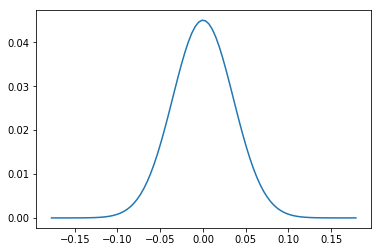

In [2]:
def gaussiana(x, a, b, c, d):
    G=a*np.exp(-((x-b)**2)/(2*c**2))+d
    return G

def deltaλ( λmax, λmin):
    dλ = ((λmax- λmin)/2 + λmin) / 60000
    return dλ

dλ = deltaλ( 5010, 5000)
print(dλ)
c  = (dλ/(2*math.sqrt(2*math.log(2))))
print(c)

x = np.arange(-5*c, 5*c + 0.004 , 0.004 )

G = gaussiana(x, 1, 0, c, 0)
G = G/G.sum() #normalização
#print(G)

plt.plot(x ,G)

1º X
2º Observado
3º Y

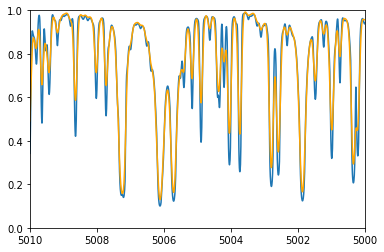

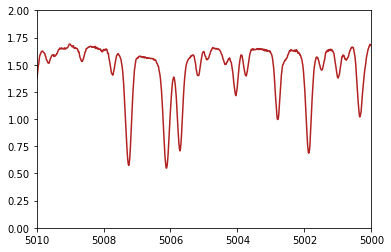

In [8]:
hdulist=pyfits.open("HD17051_rv.fits")
hdu=hdulist[0]
header=hdu.header
flux=hdu.data
lambda0=header["crval1"]
dx=header["cdelt1"]
wave=np.arange(flux.size)*dx+lambda0
hdulist1=pyfits.open('p6250-g+5.0-m0.0-t01-z+0.75-a+0.00.GES4750.fits')
hdulist2=pyfits.open('GES_UVESRed580_Lambda.fits')
sintetico1=hdulist1[0].data
sintetico2=hdulist2[0].data

def simulação(sintetico1,sintetico2,observado, dλ):
    convulsão=np.convolve(sintetico1,gaussiana(x, 1, 0, c, 0),mode="same")
    #este mode = same é para ter o mesmo número de pontos
    return convolucao

S= simulação(sintetico1, sintetico2, 0, dλ)

plt.plot(sintetico2, sintetico1 )
plt.plot(sintetico2, S/22, color = 'orange' )
plt.axis([5010,5000,0,1])
plt.show()
plt.plot(wave,flux, 'firebrick')
plt.axis([5010,5000,0,2])
plt.show()